In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook
from matplotlib.animation import FuncAnimation

def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2 = p

    # Create f = (x1',y1',x2',y2'):
    f = np.array([y1,
         (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2)) / m2])
    return f

In [2]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.5
# Spring constants
k1 = 28.0
k2 = 40.0
# Natural lengths
L1 = 0.5
L2 = 1.0
# Friction coefficients
b1 = 0.8
b2 = 0.5

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 0.5
y1 = 0.0
x2 = 2.25
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 20.0
numpoints = 500

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = np.array([stoptime * float(i) / (numpoints - 1) for i in range(numpoints)])

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('two_springs.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print(t1, w1[0], w1[1], w1[2], w1[3], file=f)

Text(0.5, 1.0, 'Mass Displacements for the\nCoupled Spring-Mass System')

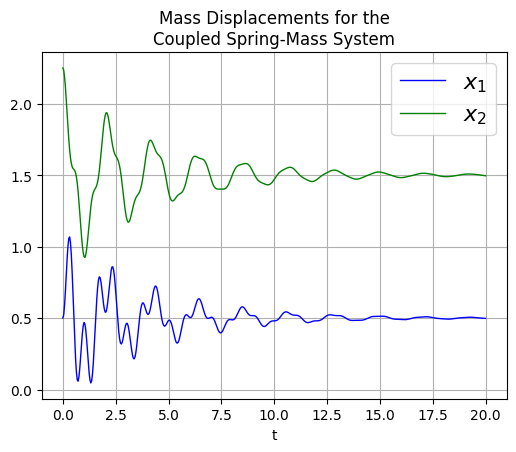

In [3]:
# Plot the solution that was generated

from numpy import loadtxt
from matplotlib.pyplot import figure, plot, xlabel, grid, legend, title
from matplotlib.font_manager import FontProperties

t, x1, xy, x2, y2 = loadtxt('two_springs.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
# hold(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Mass Displacements for the\nCoupled Spring-Mass System')
# savefig('two_springs.png', dpi=100)

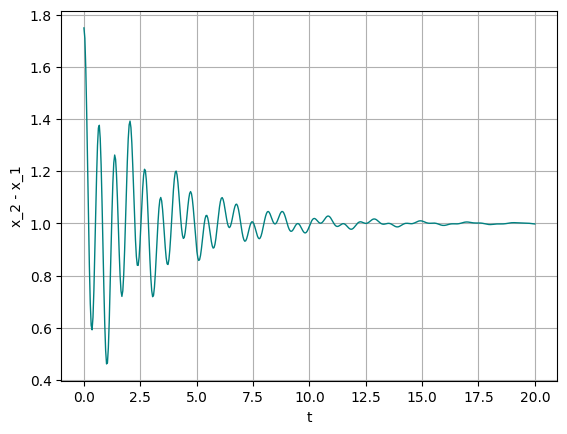

In [4]:
plt.style.use('default')
plot(t, x2-x1, color="teal", linewidth=lw)
grid(True)
xlabel("t")
plt.ylabel("x_2 - x_1")
plt.show()

x1 shape (500,)
balls_x shape (3, 500)


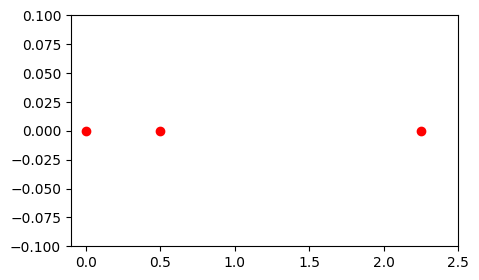

In [6]:
# animate the above

fig, ax = plt.subplots(figsize=(5, 3))
ax.set(xlim=(-0.1, 2.5), ylim=(-0.1, 0.1))
print(f"x1 shape {x1.shape}")
balls_x = np.array([np.zeros_like(x1), x1, x2])
print (f"balls_x shape {balls_x.shape}")
line = ax.plot(balls_x[:, 0], np.zeros(3), "or", linewidth=lw)[0]
def animate(i):
    line.set_xdata(balls_x[:, i])

anim = FuncAnimation(fig, animate, interval=100, repeat=True, frames=numpoints)
plt.draw()
plt.show()
# print(balls_x[:, 200])